# Wrangling and Analyze Data: WeRateDogs Twitter Data Analysis.

## Importing Packages

In [8]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import requests
import os
import json
import tweepy
import warnings
warnings.filterwarnings("ignore")

## Data Gathering


**1. Read the data into a pandas DataFrame (twitter_archive_enhanced.csv)**

In [9]:
# Reading WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) to a dataframe
twt1 = pd.read_csv('twitter-archive-enhanced.csv', sep=',')

In [10]:
# Checking to see the data was succesfully stored in DataFrame
twt1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


**2. Use the Requests Library to download the Tweet Image Prediction data (image_predictions.tsv)**

In [11]:
# Creating a directory if it doesn't exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [13]:
# Storing url in a variable
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [14]:
# Opening the file
with open(os.path.join(folder_name, url.split('/')[-1]) , mode='wb') as file:
    file.write(response.content)

In [15]:
# Reading the file into a dataframe using pandas read_csv
twt2 = pd.read_csv(url, sep='\t')

In [16]:
# Checking first two rows to see if it was correctly done
twt2.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


**3. Gathering additional data via Twitter API using the Tweepy Library (tweet_json.txt)**

In [17]:
# Importing packages
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [18]:
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [19]:
# Creating an OAuthHandler instance
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [20]:
# Tweet id to gather data via twitter API
tweet_ids = twt1.tweet_id.values
len(tweet_ids)

2356

In [21]:
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149])

In [22]:
# Getting the status of a tweet id
status = api.get_status(892420643555336193, tweet_mode='extended')
status

TweepError: [{'code': 89, 'message': 'Invalid or expired token.'}]

In [23]:
import time
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0

# creating an error dictionary to catch errors that might occur
error_dict = {}
start_time = time.time()

# Saving each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as file:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            # Getting the status id of each tweet id
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            # Converting each tweet status to a JSON object/string and saving to a file
            json.dump(tweet._json, file)
            file.write('\n')
        # Catching errors that occured 
        except tweepy.TweepError as error:
            print("Error")
            # Appending errors to error_dict
            error_dict[tweet_id] = error
            pass
end_time = time.time()
print(end_time - start_time)

1: 892420643555336193
Error
2: 892177421306343426
Error
3: 891815181378084864
Error
4: 891689557279858688
Error
5: 891327558926688256
Error
6: 891087950875897856
Error
7: 890971913173991426
Error
8: 890729181411237888
Error
9: 890609185150312448
Error
10: 890240255349198849
Error
11: 890006608113172480
Error
12: 889880896479866881
Error
13: 889665388333682689
Error
14: 889638837579907072
Error
15: 889531135344209921
Error
16: 889278841981685760
Error
17: 888917238123831296
Error
18: 888804989199671297
Error
19: 888554962724278272
Error
20: 888202515573088257
Error
21: 888078434458587136
Error
22: 887705289381826560
Error
23: 887517139158093824
Error
24: 887473957103951883
Error
25: 887343217045368832
Error
26: 887101392804085760
Error
27: 886983233522544640
Error
28: 886736880519319552
Error
29: 886680336477933568
Error
30: 886366144734445568
Error
31: 886267009285017600
Error
32: 886258384151887873
Error
33: 886054160059072513
Error
34: 885984800019947520
Error
35: 885528943205470208


Error
279: 840268004936019968
Error
280: 839990271299457024
Error
281: 839549326359670784
Error
282: 839290600511926273
Error
283: 839239871831150596
Error
284: 838952994649550848
Error
285: 838921590096166913
Error
286: 838916489579200512
Error
287: 838831947270979586
Error
288: 838561493054533637
Error
289: 838476387338051585
Error
290: 838201503651401729
Error
291: 838150277551247360
Error
292: 838085839343206401
Error
293: 838083903487373313
Error
294: 837820167694528512
Error
295: 837482249356513284
Error
296: 837471256429613056
Error
297: 837366284874571778
Error
298: 837110210464448512
Error
299: 837012587749474308
Error
300: 836989968035819520
Error
301: 836753516572119041
Error
302: 836677758902222849
Error
303: 836648853927522308
Error
304: 836397794269200385
Error
305: 836380477523124226
Error
306: 836260088725786625
Error
307: 836001077879255040
Error
308: 835685285446955009
Error
309: 835574547218894849
Error
310: 835536468978302976
Error
311: 835309094223372289
Error
312:

Error
553: 804413760345620481
Error
554: 804026241225523202
Error
555: 803773340896923648
Error
556: 803692223237865472
Error
557: 803638050916102144
Error
558: 803380650405482500
Error
559: 803321560782307329
Error
560: 803276597545603072
Error
561: 802952499103731712
Error
562: 802624713319034886
Error
563: 802600418706604034
Error
564: 802572683846291456
Error
565: 802323869084381190
Error
566: 802265048156610565
Error
567: 802247111496568832
Error
568: 802239329049477120
Error
569: 802185808107208704
Error
570: 801958328846974976
Error
571: 801854953262350336
Error
572: 801538201127157760
Error
573: 801285448605831168
Error
574: 801167903437357056
Error
575: 801127390143516673
Error
576: 801115127852503040
Error
577: 800859414831898624
Error
578: 800855607700029440
Error
579: 800751577355128832
Error
580: 800513324630806528
Error
581: 800459316964663297
Error
582: 800443802682937345
Error
583: 800388270626521089
Error
584: 800188575492947969
Error
585: 800141422401830912
Error
586:

Error
828: 769212283578875904
Error
829: 768970937022709760
Error
830: 768909767477751808
Error
831: 768855141948723200
Error
832: 768609597686943744
Error
833: 768596291618299904
Error
834: 768554158521745409
Error
835: 768473857036525572
Error
836: 768193404517830656
Error
837: 767884188863397888
Error
838: 767754930266464257
Error
839: 767500508068192258
Error
840: 767191397493538821
Error
841: 767122157629476866
Error
842: 766864461642756096
Error
843: 766793450729734144
Error
844: 766714921925144576
Error
845: 766693177336135680
Error
846: 766423258543644672
Error
847: 766313316352462849
Error
848: 766078092750233600
Error
849: 766069199026450432
Error
850: 766008592277377025
Error
851: 765719909049503744
Error
852: 765669560888528897
Error
853: 765395769549590528
Error
854: 765371061932261376
Error
855: 765222098633691136
Error
856: 764857477905154048
Error
857: 764259802650378240
Error
858: 763956972077010945
Error
859: 763837565564780549
Error
860: 763183847194451968
Error
861:

Error
1099: 736010884653420544
Error
1100: 735991953473572864
Error
1101: 735648611367784448
Error
1102: 735635087207878657
Error
1103: 735274964362878976
Error
1104: 735256018284875776
Error
1105: 735137028879360001
Error
1106: 734912297295085568
Error
1107: 734787690684657664
Error
1108: 734776360183431168
Error
1109: 734559631394082816
Error
1110: 733828123016450049
Error
1111: 733822306246479872
Error
1112: 733482008106668032
Error
1113: 733460102733135873
Error
1114: 733109485275860992
Error
1115: 732732193018155009
Error
1116: 732726085725589504
Error
1117: 732585889486888962
Error
1118: 732375214819057664
Error
1119: 732005617171337216
Error
1120: 731285275100512256
Error
1121: 731156023742988288
Error
1122: 730924654643314689
Error
1123: 730573383004487680
Error
1124: 730427201120833536
Error
1125: 730211855403241472
Error
1126: 730196704625098752
Error
1127: 729854734790754305
Error
1128: 729838605770891264
Error
1129: 729823566028484608
Error
1130: 729463711119904772
Error
11

Error
1364: 702932127499816960
Error
1365: 702899151802126337
Error
1366: 702684942141153280
Error
1367: 702671118226825216
Error
1368: 702598099714314240
Error
1369: 702539513671897089
Error
1370: 702332542343577600
Error
1371: 702321140488925184
Error
1372: 702276748847800320
Error
1373: 702217446468493312
Error
1374: 701981390485725185
Error
1375: 701952816642965504
Error
1376: 701889187134500865
Error
1377: 701805642395348998
Error
1378: 701601587219795968
Error
1379: 701570477911896070
Error
1380: 701545186879471618
Error
1381: 701214700881756160
Error
1382: 700890391244103680
Error
1383: 700864154249383937
Error
1384: 700847567345688576
Error
1385: 700796979434098688
Error
1386: 700747788515020802
Error
1387: 700518061187723268
Error
1388: 700505138482569216
Error
1389: 700462010979500032
Error
1390: 700167517596164096
Error
1391: 700151421916807169
Error
1392: 700143752053182464
Error
1393: 700062718104104960
Error
1394: 700029284593901568
Error
1395: 700002074055016451
Error
13

Error
1629: 684588130326986752
Error
1630: 684567543613382656
Error
1631: 684538444857667585
Error
1632: 684481074559381504
Error
1633: 684460069371654144
Error
1634: 684241637099323392
Error
1635: 684225744407494656
Error
1636: 684222868335505415
Error
1637: 684200372118904832
Error
1638: 684195085588783105
Error
1639: 684188786104872960
Error
1640: 684177701129875456
Error
1641: 684147889187209216
Error
1642: 684122891630342144
Error
1643: 684097758874210310
Error
1644: 683857920510050305
Error
1645: 683852578183077888
Error
1646: 683849932751646720
Error
1647: 683834909291606017
Error
1648: 683828599284170753
Error
1649: 683773439333797890
Error
1650: 683742671509258241
Error
1651: 683515932363329536
Error
1652: 683498322573824003
Error
1653: 683481228088049664
Error
1654: 683462770029932544
Error
1655: 683449695444799489
Error
1656: 683391852557561860
Error
1657: 683357973142474752
Error
1658: 683142553609318400
Error
1659: 683111407806746624
Error
1660: 683098815881154561
Error
16

Error
1895: 674743008475090944
Error
1896: 674742531037511680
Error
1897: 674739953134403584
Error
1898: 674737130913071104
Error
1899: 674690135443775488
Error
1900: 674670581682434048
Error
1901: 674664755118911488
Error
1902: 674646392044941312
Error
1903: 674644256330530816
Error
1904: 674638615994089473
Error
1905: 674632714662858753
Error
1906: 674606911342424069
Error
1907: 674468880899788800
Error
1908: 674447403907457024
Error
1909: 674436901579923456
Error
1910: 674422304705744896
Error
1911: 674416750885273600
Error
1912: 674410619106390016
Error
1913: 674394782723014656
Error
1914: 674372068062928900
Error
1915: 674330906434379776
Error
1916: 674318007229923329
Error
1917: 674307341513269249
Error
1918: 674291837063053312
Error
1919: 674271431610523648
Error
1920: 674269164442398721
Error
1921: 674265582246694913
Error
1922: 674262580978937856
Error
1923: 674255168825880576
Error
1924: 674082852460433408
Error
1925: 674075285688614912
Error
1926: 674063288070742018
Error
19

Error
2160: 669571471778410496
Error
2161: 669567591774625800
Error
2162: 669564461267722241
Error
2163: 669393256313184256
Error
2164: 669375718304980992
Error
2165: 669371483794317312
Error
2166: 669367896104181761
Error
2167: 669363888236994561
Error
2168: 669359674819481600
Error
2169: 669354382627049472
Error
2170: 669353438988365824
Error
2171: 669351434509529089
Error
2172: 669328503091937280
Error
2173: 669327207240699904
Error
2174: 669324657376567296
Error
2175: 669216679721873412
Error
2176: 669214165781868544
Error
2177: 669203728096960512
Error
2178: 669037058363662336
Error
2179: 669015743032369152
Error
2180: 669006782128353280
Error
2181: 669000397445533696
Error
2182: 668994913074286592
Error
2183: 668992363537309700
Error
2184: 668989615043424256
Error
2185: 668988183816871936
Error
2186: 668986018524233728
Error
2187: 668981893510119424
Error
2188: 668979806671884288
Error
2189: 668975677807423489
Error
2190: 668967877119254528
Error
2191: 668960084974809088
Error
21

In [17]:
# Checking the size of the error dictionary
len(error_dict)

29

In [18]:
# Creating an empty list
twt3_list = []
# Opening and Reading text file
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file.readlines():
        tweet_line = json.loads(line)
        # Getting the requred columns
        tweet_id = tweet_line['id']
        retweet_count = tweet_line['retweet_count']
        favorite_count = tweet_line['favorite_count']
        
         # Appending each to the list
        twt3_list.append({
                "tweet_id" : tweet_id,
                "retweet_count" : retweet_count,
                "favorite_count" : favorite_count})
        

In [19]:
# converting to pandas dataframe
twt3 = pd.DataFrame(twt3_list, columns=["tweet_id",'retweet_count', 'favorite_count'])

In [20]:
# Checking to see if it was correctly done
twt3.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6970,33696
1,892177421306343426,5272,29223
2,891815181378084864,3464,21978
3,891689557279858688,7191,36791
4,891327558926688256,7717,35183


## Assessing Data


### Assessing twt1 (Twitter Archive Data)
*Here's a brief decription of column headers*

> - tweet_id: The unique id for each tweet by the twitter account.
> - in_reply_to_status_id: This field will contain the integer representation of the original Tweet’s ID if the represented Tweet is a reply.
> - in_reply_to_user_id: This field will contain the integer representation of the original Tweet’s author ID. It will not always be the user directly mentioned in the Tweet If the represented Tweet is a reply.
> - timestamp: The time the tweet was tweeted.
> - source: The source of the tweet
>-text: This is the content of the tweet.
> - retweeted_status_id: This field contains a representation of the original Tweet that was retweeted.
> - retweeted_status_user_id: The id of the retweeted status user.
.retweeted_status_timestamp: This field contains a representation of the time the original Tweet was retweeted.
> - expanded_urls: This is the url of the tweet.
> - rating_numerator: This is the numerator of the ratings for the dog.
> - rating_denominator: This is the denominator of the ratings for the dog should be 10.
> - name: This is the name of the dog.
> - doggo: This is one of the dog stages.
> - floofer: This is one of the dog stages.
> - pupper: This is one of the dog stages.
> - puppo: This is one of the dog stages.

### Visual Assessment

In [21]:
# Scrolling through the dataframe to assess
twt1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Programmatic Assessment

In [22]:
# Checking the first five rows
twt1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [23]:
# Checking random 5 rows
twt1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
988,748977405889503236,NaN,NaN,2016-07-01 20:31:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What jokester sent in a pic without a dog in i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748977405...,10,10,not,None,None,None,None
166,859924526012018688,NaN,NaN,2017-05-04 00:15:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Milky. She has no idea what happened. Jus...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859924526...,12,10,Milky,None,None,None,None
1275,709179584944730112,NaN,NaN,2016-03-14 00:49:23 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Sammy. He's in a tree. Very excited ab...,NaN,NaN,NaN,https://vine.co/v/iwAjdlEjwMl,13,10,Sammy,None,None,None,None
1232,713175907180089344,NaN,NaN,2016-03-25 01:29:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Opie and Clarkus. Clarkus fell as...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713175907...,10,10,Opie,None,None,None,None
1961,673359818736984064,NaN,NaN,2015-12-06 04:34:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Steve. He was just relaxing in hot tub...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673359818...,8,10,Steve,None,None,None,None


In [24]:
# Checking the number of rows and columns
twt1.shape

(2356, 17)

*The twitter archive data contains 2356 rows of data and 17 columns.*

In [25]:
# Getting a concise summary of data
twt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [26]:
# Checking Statistics of data
twt1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [27]:
# Checking for duplicates
twt1.duplicated().sum()

0

In [28]:
# Checking for missing data or nulls
twt1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [29]:
# Getting counts of unique values in rating_denominator column and sorting in descending order
twt1.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [30]:
# Checking where the rating_denominator is not 10
twt1.rating_denominator[twt1.rating_denominator != 10]

313       0
342      15
433      70
516       7
784      11
902     150
1068     11
1120    170
1165     20
1202     50
1228     90
1254     80
1274     50
1351     50
1433     40
1598     20
1634    130
1635    110
1662     11
1663     16
1779    120
1843     80
2335      2
Name: rating_denominator, dtype: int64

In [31]:
len(twt1.rating_denominator[twt1.rating_denominator != 10])

23

*As shown above, There are 23 rows where the rating_denominator is not 10, this is an inconsistent issue.*

In [32]:
# Getting counts of unique values in rating_denominator column and sorting in ascending order
twt1.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

*There are rows where rating_numerator is greater than 10, but this will not be addressed because its part of the unique rating system of the twitter account.*

In [33]:
# Getting counts of unique values of name column
twt1.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
the            8
Sadie          8
Toby           7
Daisy          7
Buddy          7
Bailey         7
an             7
Rusty          6
Milo           6
Stanley        6
Jax            6
Scout          6
Oscar          6
Leo            6
Bella          6
Jack           6
Dave           6
Koda           6
Gus            5
            ... 
Brat           1
Timmy          1
Pubert         1
Humphrey       1
Dunkin         1
Siba           1
life           1
Jeffri         1
Fillup         1
Jett           1
William        1
Kevon          1
Kingsley       1
Clarkus        1
Darrel         1
Buddah         1
Terrenth       1
Bert           1
Maks           1
Coopson        1
Tanner         1
Maisey         1
Dallas         1
Jersey         1
Cora           1
Ace            1
Bookstore      1
Flash         

*I observed that names starting with lower case aren't real dog names.*

In [34]:
# Using Regex to get the list of all names that are lowercase 
names_lower = twt1.name.str.contains('^[a-z]', regex = True)
twt1[names_lower].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [35]:
len(twt1[names_lower].name)

109

*This has been successfully assessed that all strings starting with lower case are not names for dogs.*

In [36]:
# Getting counts of unique values in source
twt1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [37]:
# Getting the content of the text in the first row
twt1.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [38]:
# Checking the names of each columns since I plan to merge dataframes
twt1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Assesing twt2 (Image Predictions data)
Here's a brief decription of column headers

> - tweet_id: Unique id for each tweet by the twitter account.
> - jpg_url: Url for the dog image.
> - img_num: Image number ranging from 1 to 4.
> - p1: The algorithm's #1 prediction for the image in the tweet.
> - p1_conf: How confident the algorithm is in its #1 prediction.
> - p1_dog: Whether or not the #1 prediction is a breed of dog.
> - p2: The algorithm's #2 prediction for the image in the tweet.
> - p2_conf: How confident the algorithm is in its #2 prediction.
> - p2_dog: Whether or not the #2 prediction is a breed of dog.
> - p3: The algorithm's #3 prediction for the image in the tweet.
> - p3_conf: How confident the algorithm is in its #3 prediction.
> - p3_dog: Whether or not the #3 prediction is a breed of dog.

### Visual Assessment

In [39]:
# Checking the rows and columns visually for any  tidiness and data quality issues.
twt2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Programmatic Assessment

In [40]:
# Checking the first five rows
twt2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [41]:
# Checking random 5 rows
twt2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
175,669037058363662336,https://pbs.twimg.com/media/CUjlp51WcAA1vGA.jpg,1,Chihuahua,0.803528,True,Pomeranian,0.053871,True,chow,0.032257,True
315,671735591348891648,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False
1952,863553081350529029,https://pbs.twimg.com/ext_tw_video_thumb/86355...,1,Eskimo_dog,0.413330,True,malamute,0.347646,True,Siberian_husky,0.149536,True
551,677557565589463040,https://pbs.twimg.com/media/CWcrAVQWEAA6QMp.jpg,1,seat_belt,0.277257,False,Shih-Tzu,0.249017,True,Pekinese,0.209213,True
573,678424312106393600,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,1,Maltese_dog,0.759945,True,toy_poodle,0.101194,True,Shih-Tzu,0.056037,True


In [42]:
# Checking the number of rows and columns
twt2.shape

(2075, 12)

*The Image prediction dataframe consists of 2075 rows and 12 columns.*

In [43]:
# Getting a concise summary of data
twt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [44]:
# Checking statistics of data for numerical variables
twt2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [45]:
# Checking for duplicates
twt2.duplicated().sum()

0

In [46]:
# Checking for missing data or nulls
twt2.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [47]:
# Getting counts of unique values of p1_dog column
twt2.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [48]:
# Getting counts of unique values of p1 column
twt2.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
web_site                      19
Cardigan                      19
Maltese_dog                   18
Shetland_sheepdog             18
teddy                         18
beagle                        18
Eskimo_dog                    18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [49]:
# Getting counts of unique values of p1_conf column
twt2.p1_conf.value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
0.420463    2
0.581403    2
0.403698    2
0.530104    2
0.254856    2
0.346545    2
0.721188    2
0.677408    2
0.907083    2
0.243529    2
0.505370    2
0.593858    2
0.372202    2
0.274637    2
0.600276    2
0.506312    2
0.615163    2
0.556595    2
0.995143    2
0.809197    2
0.964929    2
0.777468    2
0.336200    2
0.617389    2
0.786089    2
           ..
0.483228    1
0.556524    1
0.176423    1
0.318981    1
0.733025    1
0.730152    1
0.436023    1
0.479008    1
0.162935    1
0.897162    1
0.320420    1
0.999833    1
0.995873    1
0.523206    1
0.942911    1
0.537652    1
0.672791    1
0.952258    1
0.855959    1
0.665578    1
0.841265    1
0.668164    1
0.946828    1
0.714719    1
0.352946    1
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [50]:
# Checking the names of each columns since I plan to merge dataframes
twt2.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Assessing twt3 (Tweets Data)
Here's a brief decription of column headers

> - tweet_id: Unique id for each tweet by the twitter account @DogRates
> - retweet_count: The number of times the tweet has been retweeted
> - favorite_count: The number of times the tweet has been favorited(now known as liked)

### Visual Assessment

In [51]:
# Checking the rows and columns visually for any  tidiness and data quality issues 
twt3

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6970,33696
1,892177421306343426,5272,29223
2,891815181378084864,3464,21978
3,891689557279858688,7191,36791
4,891327558926688256,7717,35183
5,891087950875897856,2586,17749
6,890971913173991426,1647,10331
7,890729181411237888,15680,56670
8,890609185150312448,3604,24427
9,890240255349198849,6068,27848


### Programmatic Assessment

In [52]:
# Checking the first five rows
twt3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6970,33696
1,892177421306343426,5272,29223
2,891815181378084864,3464,21978
3,891689557279858688,7191,36791
4,891327558926688256,7717,35183


In [53]:
# Checking random 5 rows
twt3.sample(5)

,tweet_id,retweet_count,favorite_count
616,793500921481273345,2223,10085
838,762471784394268675,5876,10483
528,805520635690676224,1547,5463
573,798925684722855936,1355,7145
1329,703407252292673536,623,2253


In [54]:
# Checking the number of rows and columns
twt3.shape

(2327, 3)

*The twitter archive data contains 2327 rows of data and 3 columns*

In [55]:
# Getting a concise summary of data
twt3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [56]:
# Checking for duplicates
twt3.duplicated().sum()

0

In [57]:
# Checking for missing data or nulls
twt3.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [58]:
# Checking the names of each columns since I plan to merge dataframes where possible
twt3.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Quality issues
1. Retweeted status id is not null and needs to be dropped, also reply tweets needs to be dropped because I only need Tweets and not Retweets.


2. Rating Denominator is not 10 in some row.


3. Source column is a combination of url and text instead of text.


4. Incorrect dog names in name column.


5. Irrelevant column img_num needs to be dropped because I'll not be using it for analysis.


6. Missing values in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls columns.


7. Redundant data in text column


8. Incorrect datatype of timestamp and retweetedstatus_timestamp column.


9. Incorrect datatype for Tweet Id as integer instead of string.



### Tidiness issues
1. dog_stage in Twitter Archive data (twt1) is in 4 columns instead of 1.


2. Twitter archive data (twt1), image Predictions data(twt2), and Tweets data (twt3) should be joined.



## Cleaning Data


In [171]:
# Make copies of original pieces of data
twt1_clean = twt1.copy()
twt2_clean = twt2.copy()
twt3_clean = twt3.copy()

### Issue #1:

#### Define:

Drop Rows where Retweet_id Drop and in_reply_to_status_id and in_reply_to_user_id is not null (Because We Only need Tweets and not Retweets for our analysis)

#### Code

In [172]:
print("# of retweets:  {}".format(sum(twt1.retweeted_status_id.notnull())))

# of retweets:  181


In [173]:
# Filtering to get only rows where retweets is null
twt1_clean = twt1_clean[twt1_clean.retweeted_status_id.isnull()]

In [174]:
#Drop all rows that are replies, those that have non-null values in these columns: 
print("# of replies:  {}".format(sum(twt1_clean.in_reply_to_status_id.notnull())))

# of replies:  78


In [175]:
twt1_clean = twt1_clean[twt1_clean.in_reply_to_status_id.isna()]

#### Test

In [176]:
twt1_clean.retweeted_status_id.notnull().sum()

0

In [177]:
twt1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

*As seen above, there are no rows where retweeted_status_id is not null, the code also handled retweeted_status_user_id and retweeted_status_timestamp. This shows we only have Tweets and not Retweets in our dataframe*

### Issue #2:

#### Define
Drop rows where rating_denominator is not 10 only 23 rows will be dropped as shown in the assessing section.

#### Code

In [178]:
# Filter to get only rows where rating_denominator is equal to 10
twt1_clean= twt1[twt1['rating_denominator'] == 10]

#### Test

In [179]:
len(twt1_clean.rating_denominator[twt1.rating_denominator != 10])

0

In [180]:
twt1_clean.rating_denominator.value_counts()

10    2333
Name: rating_denominator, dtype: int64

*There are no rows where the denominator is not equal to 10*

### Issue #3:

#### Define
Extract source text from source column in twitter achive data - twt1_clean

#### Code

In [181]:
# Getting the unique values in source column
twt1_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2198
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [182]:
# Replacing the source with only the text component
twt1_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone', inplace=True)
twt1_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene', inplace=True)
twt1_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client', inplace=True)
twt1_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck', inplace=True)

#### Test

In [183]:
twt1_clean.source.value_counts()

Twitter for iPhone     2198
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #4:

#### Define
Remove rows where dog name is in lower case which are not dog names.

#### Code

In [184]:
# Using Regex(Regular expressions) to get the list of all names that are lowercase 
names_lower = twt1_clean.name.str.contains('^[a-z]', regex = True)
twt1_clean[names_lower].name.value_counts().sort_index()

a               54
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
unacceptable     1
very             5
Name: name, dtype: int64

In [185]:
# Checking count of number of rows where name is in lowercase
len(twt1_clean[names_lower].name)

106

In [186]:
# Filtering to get only rows where name contains with Upper case letter
twt1_clean = twt1_clean[twt1_clean['name'].str.contains('^[A-Z]+')]

#### Test

In [187]:
twt1_clean[names_lower].name.value_counts().sort_index()

Series([], Name: name, dtype: int64)

In [188]:
len(twt1_clean[names_lower].name)

0

### Issue #5:

#### Define
Drop column img_num in image predictions dataframe - twt2_clean, it is not necessary for our analysis.

#### Code

In [189]:
twt2_clean.drop('img_num', axis=1, inplace=True)

#### Test

In [190]:
twt2_clean.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Issue #6:

#### Define
Drop the following columns in the twt1 DataFrame: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls because they contain missing values and won't help in the analysis.

#### Code

In [191]:
twt1_clean.drop(columns= ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
                          'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)

#### Test

In [192]:
twt1_clean.shape

(2227, 11)

In [193]:
twt1_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #7:

#### Define
Join doggo, floofer, pupper, and puppo columns into one column called "dog_stage' then drop the columns.

#### Code

In [194]:
# Replacing none in the respective columns with no space
twt1_clean['doggo'].replace("None",  "", inplace=True)
twt1_clean['floofer'].replace("None", "", inplace=True)
twt1_clean['pupper'].replace("None", "", inplace=True)
twt1_clean['puppo'].replace("None", "", inplace=True)

In [195]:
# Using lambda to join the columns
twt1_clean['dog_stage'] = twt1_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ''.join(x), axis = 1)

In [196]:
# Separating rows that meet certain conditions with a comma
twt1_clean['dog_stage'].mask(twt1_clean['dog_stage'] == 'doggopupper', 'doggo,pupper', inplace=True)
twt1_clean['dog_stage'].mask(twt1_clean['dog_stage'] == 'doggofloofer', 'doggo,floofer ', inplace=True) 
twt1_clean['dog_stage'].mask(twt1_clean['dog_stage'] == 'doggopuppo', 'doggo,puppo', inplace=True) 

In [197]:
# Replacing empty spaces with None in the dog_stage column
twt1_clean['dog_stage'] = twt1_clean['dog_stage'].replace('', 'None')

In [198]:
# Dropping columns
twt1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [199]:
twt1_clean.dog_stage.value_counts()

None              1863
pupper             233
doggo               81
puppo               29
doggo,pupper        10
floofer              9
doggo,puppo          1
doggo,floofer        1
Name: dog_stage, dtype: int64

In [200]:
# check if doggo, floofer, pupper and puppo columns have been successfully dropped
twt1_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

### Issue #8:

#### Define
Merging Twitter archive data(twt1_clean), Image Predictions data(twt2_clean), and Tweet data (twt3_clean).

#### Code

In [201]:
# merge inner to get only tweets that appear in both dataframe
twt_merged1 = twt1_clean.merge(twt2_clean, how='inner', on='tweet_id')

In [202]:
twt_merged2 = twt_merged1.merge(twt3_clean, how='inner', on='tweet_id')

#### Test

In [203]:
twt_merged2

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,6970,33696
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5272,29223
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3464,21978
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7191,36791
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7717,35183
5,891087950875897856,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching ...,13,10,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2586,17749
6,890971913173991426,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,1647,10331
7,890729181411237888,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a g...,13,10,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,15680,56670
8,890609185150312448,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,3604,24427
9,890240255349198849,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,6068,27848


In [204]:
twt_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1942 entries, 0 to 1941
Data columns (total 20 columns):
tweet_id              1942 non-null int64
timestamp             1942 non-null object
source                1942 non-null object
text                  1942 non-null object
rating_numerator      1942 non-null int64
rating_denominator    1942 non-null int64
name                  1942 non-null object
dog_stage             1942 non-null object
jpg_url               1942 non-null object
p1                    1942 non-null object
p1_conf               1942 non-null float64
p1_dog                1942 non-null bool
p2                    1942 non-null object
p2_conf               1942 non-null float64
p2_dog                1942 non-null bool
p3                    1942 non-null object
p3_conf               1942 non-null float64
p3_dog                1942 non-null bool
retweet_count         1942 non-null int64
favorite_count        1942 non-null int64
dtypes: bool(3), float64(3), int64(5), ob

### Issue #10:

#### Define
Drop text column since it won't be impactfull in our analysis.

#### Code

In [205]:
twt_merged2.drop(['text'], axis = 1, inplace=True)

#### Test

In [206]:
twt_merged2.columns

Index(['tweet_id', 'timestamp', 'source', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'jpg_url', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'retweet_count', 'favorite_count'],
      dtype='object')

### Issue #11:

#### Define
Convert tweet_id to string, convert timestamp to datetime, convert dog_stage, p1_dog, p2_dog and p3_dog to categorical datatype.

#### Code

In [207]:
twt_merged2.tweet_id = twt_merged2.tweet_id.astype(str)

In [208]:
twt_merged2.timestamp = pd.to_datetime(twt_merged2.timestamp)

In [209]:
twt_merged2.dog_stage = twt_merged2.dog_stage.astype('category')

In [210]:
twt_merged2.p1_dog = twt_merged2.p1_dog.astype('category')

In [211]:
twt_merged2.p2_dog = twt_merged2.p2_dog.astype('category')

In [212]:
twt_merged2.p3_dog = twt_merged2.p3_dog.astype('category')

#### Test

In [213]:
twt_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1942 entries, 0 to 1941
Data columns (total 19 columns):
tweet_id              1942 non-null object
timestamp             1942 non-null datetime64[ns]
source                1942 non-null object
rating_numerator      1942 non-null int64
rating_denominator    1942 non-null int64
name                  1942 non-null object
dog_stage             1942 non-null category
jpg_url               1942 non-null object
p1                    1942 non-null object
p1_conf               1942 non-null float64
p1_dog                1942 non-null category
p2                    1942 non-null object
p2_conf               1942 non-null float64
p2_dog                1942 non-null category
p3                    1942 non-null object
p3_conf               1942 non-null float64
p3_dog                1942 non-null category
retweet_count         1942 non-null int64
favorite_count        1942 non-null int64
dtypes: category(4), datetime64[ns](1), float64(3), int64(4),

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [214]:
# storing in a csv file called twitter_archive_master.csv
twt_merged2.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data


In [215]:
# Reading the cleaned data to a datframe
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [216]:
# Getting a preview of the data
twitter_archive_master.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,6970,33696
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5272,29223
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3464,21978
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7191,36791
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7717,35183


### Insights:
1. Which Dog Stage got most likes on twitter?

2. Which Dog Stage got the most Retweets?

3. How is the source of the tweets shared across different platforms?

#### Question 1: Which dog stage got most likes on twitter?

In [217]:
twitter_archive_master.groupby('dog_stage')['favorite_count'].mean().sort_values(ascending=False)

dog_stage
doggo,puppo       41814.000000
puppo             18656.260870
doggo             16949.968254
doggo,floofer     14801.000000
floofer           11178.857143
doggo,pupper      11012.888889
None               7143.205254
pupper             5918.402985
Name: favorite_count, dtype: float64

Text(0.5,0,'Dog Stage')

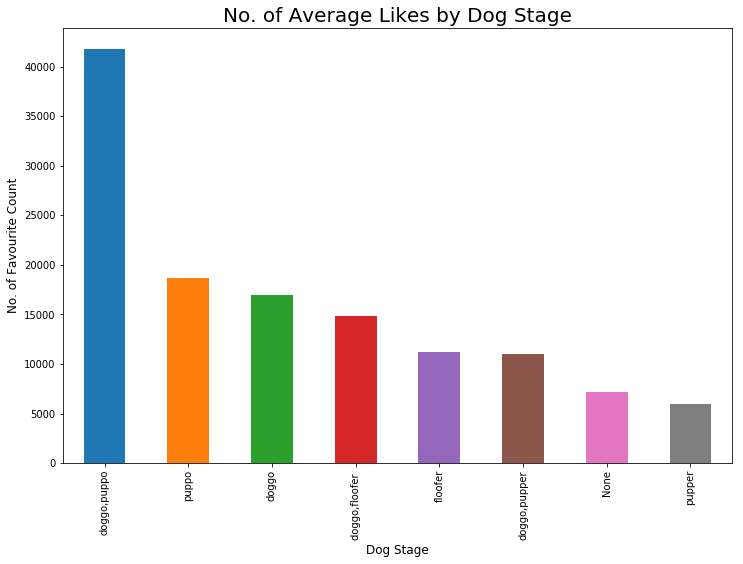

In [218]:
twitter_archive_master.groupby('dog_stage')['favorite_count'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,8))
plt.title('No. of Average Likes by Dog Stage', fontsize=20)
plt.ylabel('No. of Favourite Count', fontsize=12)
plt.xlabel('Dog Stage', fontsize=12)

*From the insight and the bar chart I can conclude that the top 3 dog_stages to receive the highets number of likes (favorite_count) are doggo,puppo | doggo and puppo.*

#### Question 2: Which dog stage got the most Retweets?

In [219]:
twitter_archive_master.groupby('dog_stage')['retweet_count'].mean().sort_values(ascending=False)

dog_stage
doggo,puppo       16076.000000
doggo              6653.285714
puppo              5261.521739
doggo,pupper       4845.000000
floofer            3959.857143
doggo,floofer      2784.000000
None               2189.830177
pupper             1970.333333
Name: retweet_count, dtype: float64

Text(0.5,0,'Dog Stage')

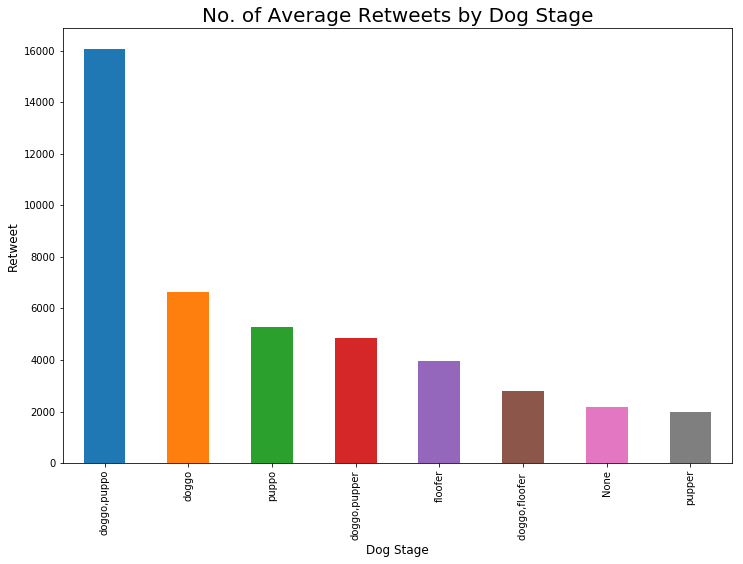

In [220]:
twitter_archive_master.groupby('dog_stage')['retweet_count'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,8))
plt.title('No. of Average Retweets by Dog Stage', fontsize=20)
plt.ylabel('Retweet', fontsize=12)
plt.xlabel('Dog Stage', fontsize=12)

*From the insight and the bar chart I can conclude that the top 3 dog_stages to receive the highets number of retweets (retweet_count) are doggo,puppo | doggo and puppo.*

#### Question 3: How is the source of the tweets shared across different platforms?

In [221]:
twitter_archive_master['source'].value_counts()

Twitter for iPhone    1906
Twitter Web Client      27
TweetDeck                9
Name: source, dtype: int64

Text(0.5,1,'Sources of Tweets')

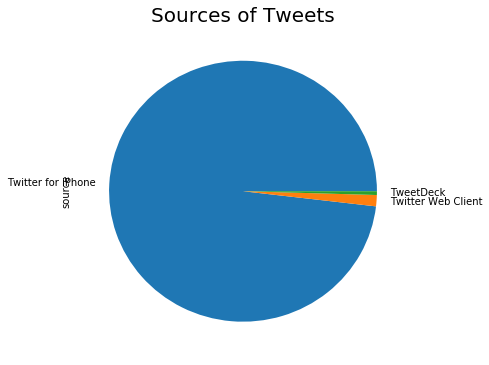

In [222]:
twitter_archive_master['source'].value_counts().plot(kind='pie', figsize=(6,6))
plt.title('Sources of Tweets', fontsize=20)

### Visualization

### Do we have a correlation between Retweet_count (retweets) and Favourite_count (likes)?

Text(0,0.5,'LIkes')

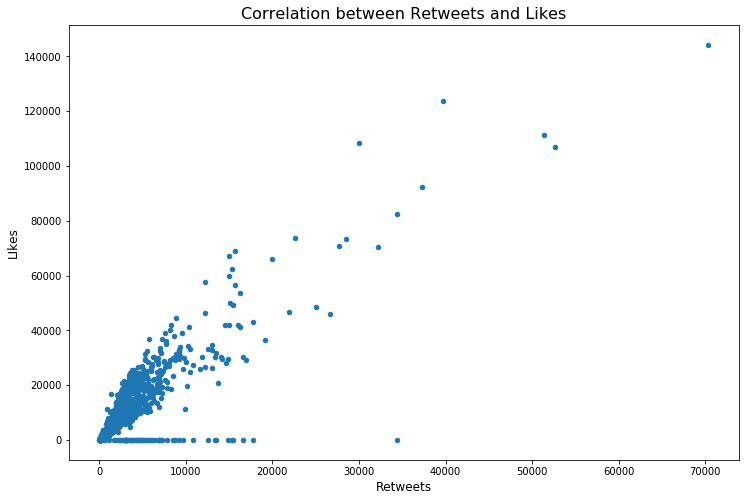

In [223]:
twitter_archive_master.plot(x = "retweet_count", y = "favorite_count", kind ='scatter', figsize=(12,8))
plt.title('Correlation between Retweets and Likes', fontsize=16)
plt.xlabel('Retweets', fontsize=12)
plt.ylabel('LIkes', fontsize=12)

*There's a positive correlation between retweets and Likes to mean that weets that get more retweets are likely to acquire more likes.*

In [7]:
zip -r workspace.zip.

SyntaxError: invalid syntax (<ipython-input-7-672f55b374ba>, line 1)